<a href="https://colab.research.google.com/github/nars95/machine_learning/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
print('tensorflow = {} e keras api = {}'.format(tf.__version__, keras.__version__))

tensorflow = 2.12.0 e keras api = 2.12.0


In [36]:
(x_train_full, y_train_full), (X_test, y_test) =  fashion_mnist.load_data()

In [5]:
print(x_train_full.shape, x_train_full.dtype)

(60000, 28, 28) uint8


In [38]:
X_val, X_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0
print(X_train.shape, X_train.dtype)

(55000, 28, 28) float64


In [7]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(y_train[100])
print(class_name[y_train[100]])

2
Pullover


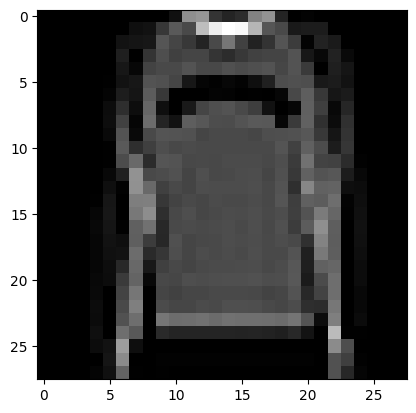

In [8]:
img = X_train[100]
plt.imshow(img, cmap='gray')
plt.show();

#Treinando um modelo para reconhecer as imagens do fashion_mnist usando Api Sequential do keras.

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


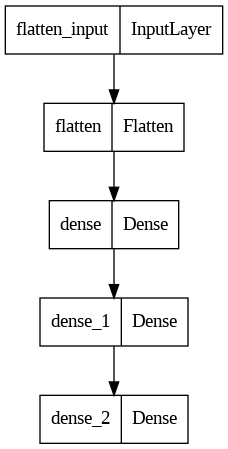

In [11]:
 # gerando uma imagem do modelo
img_model = keras.utils.plot_model(model)
img_model

In [12]:
model.layers # camadas do modelo

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer('dense') is hidden1

True

#Acessando os pesos de uma camada Densa: que inclui os pesos de conexão e os vieses de cada neurônio da camada.

Para isso usamos o método o get_weights(). Esse método retorna uma lista com dois elementos: 1) Elemento é uma matriz de pesos do modelo, isto é, a conexação da camada anterior e os neurônios desta camada. 2) Um vetor contendo o vies de cada neurônio da camada, que no caso da hidden1 (dense) é um vetor com 300 vieses. Vamos dar uma olhada nisso:

In [15]:
first, second = hidden1.get_weights()
print(first.shape, second.shape)


(784, 300) (300,)


#Compilando o modelo

In [21]:
from keras.engine.training import optimizer
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#Treinando e avaliando o modelo

In [22]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 12s 4ms/step - loss: 0.7047 - accuracy: 0.7699 - val_loss: 0.4896 - val_accuracy: 0.8384
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4837 - accuracy: 0.8312 - val_loss: 0.4541 - val_accuracy: 0.8466
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4398 - accuracy: 0.8456 - val_loss: 0.4347 - val_accuracy: 0.8448
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4138 - accuracy: 0.8547 - val_loss: 0.4025 - val_accuracy: 0.8594
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3935 - accuracy: 0.8614 - val_loss: 0.3846 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3774 - accuracy: 0.8661 - val_loss: 0.3802 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3644 - accuracy: 0.8723 - val_loss: 0.3758 - val_accuracy

O método .fit() retorna um objeto History que contém alguns atributos importantes: History.epoch (lista de épocas pelos quais passou), History.params (parâmetros de treinamento) e History.history (métricas de acurácia e perda - tanto do treinamento quanto da validação, caso exista.)

In [29]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.704745,0.769873,0.489602,0.8384
1,0.483742,0.831200,0.454127,0.8466
2,0.439820,0.845582,0.434732,0.8448
3,0.413824,0.854709,0.402483,0.8594
4,0.393543,0.861400,0.384644,0.8688
5,0.377420,0.866073,0.380165,0.8706
6,0.364400,0.872345,0.375838,0.8684
7,0.353412,0.875800,0.378117,0.8672
8,0.344348,0.878127,0.351166,0.8742
9,0.333032,0.881818,0.348063,0.8776


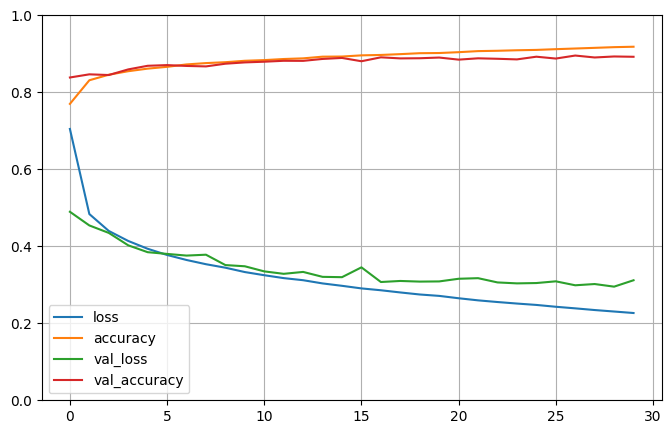

In [34]:
metrics.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3450 - accuracy: 0.8792


[0.34504276514053345, 0.8791999816894531]

In [42]:
X_new = X_test[:3]
predict_proba = model.predict(X_new)
predict_proba

1/1 [==============================] - 0s 49ms/step


array([[1.1862755e-06, 4.3938329e-08, 6.7331866e-06, 1.4392899e-07,
        3.0724111e-06, 3.8523572e-03, 6.0832517e-06, 1.6986053e-02,
        1.7319998e-04, 9.7897112e-01],
       [5.0751787e-05, 6.7863626e-10, 9.9416095e-01, 1.9757300e-08,
        5.6976504e-03, 4.7460847e-13, 9.0664515e-05, 1.1994016e-12,
        1.7778795e-08, 5.2409521e-11],
       [8.5269653e-07, 9.9999809e-01, 3.0589209e-07, 1.2231094e-07,
        2.2108270e-07, 2.4915246e-12, 2.5352815e-09, 3.0837326e-11,
        3.4611446e-07, 1.2452414e-12]], dtype=float32)

In [52]:
predict_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [53]:
y_test[:3]

array([9, 2, 1], dtype=uint8)